# Ensemble Methods

## Ensembles
Ensembles is about how we can combine (or ensemble) the models in a way that makes the combination of these models better at predicting than the individual models. In fact the default for most ensemble methods is a decision tree in sklearn.<br>

### Why Would We Want to Ensemble Learners Together?
There are two competing variables in finding a well fitting machine learning model: **Bias** and **Variance**.

- **Bias:** When a model has high bias, this means that means it doesn't do a good job of bending to the data.<br>
  An example of an algorithm that usually has high bias is linear regression. Even with completely different datasets, we end up with the same line fit to the data. When models have high bias, this is bad.
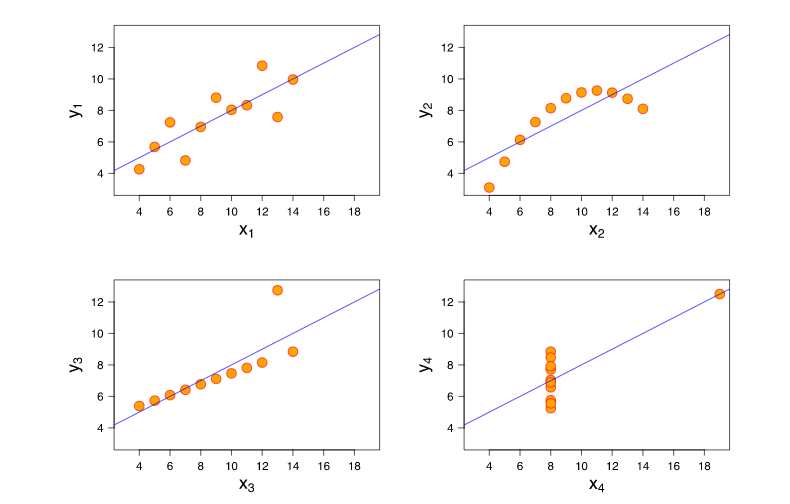

- **Variance:** When a model has high variance, this means that it changes drastically to meet the needs of every point in our dataset. Linear models like the one above has low variance, but high bias. <br>
  An example of an algorithm that tends to have high variance and low bias is a decision tree (especially decision trees with no early stopping parameters). A decision tree, as a high variance algorithm, will attempt to split every point into its own branch if possible. This is a trait of high variance, low bias algorithms - they are extremely flexible to fit exactly whatever data they see.


By combining algorithms, we can often build models that perform better by meeting in the middle in terms of bias and variance. There are some other tactics that are used to combine algorithms in ways that help them perform better as well. These ideas are based on minimizing bias and variance based on mathematical theories, like the central limit theorem.

### Introducing Randomness Into Ensembles
Another method that is used to improve ensemble methods is to introduce randomness into high variance algorithms before they are ensembled together. The introduction of randomness combats the tendency of these algorithms to overfit (or fit directly to the data available). There are two main ways that randomness is introduced:

- **Bootstrap the data** - that is, sampling the data with replacement and fitting your algorithm to the sampled data.

- **Subset the features** - in each split of a decision tree or with each algorithm used in an ensemble, only a subset of the total possible features are used.

In fact, these are the two random components used in the next algorithm you are going to see called **random forests.**

# Spam Detection Ensemble Methode

In [1]:
# Import our libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Dataset available using filepath 'datasets/SMSSpamCollection'
df = pd.read_table('datasets/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

In [4]:
# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

In [5]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

In [6]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

In [7]:
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [8]:
# Instantiate our model
naive_bayes = MultinomialNB()

# Fit our model to the training data
naive_bayes.fit(training_data, y_train)

# Predict on the test data
predictions = naive_bayes.predict(testing_data)

In [9]:
# Score our model
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


### Turns Out...

It turns out that our naive bayes model actually does a pretty good job.  However, let's take a look at a few additional models to see if we can't improve anyway.

Specifically in this notebook, we will take a look at the following techniques:

* [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier)
* [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)

Another really useful guide for ensemble methods can be found [in the documentation here](http://scikit-learn.org/stable/modules/ensemble.html).

These ensemble methods use a combination of techniques you have seen throughout this lesson:

* **Bootstrap the data** passed through a learner (bagging).
* **Subset the features** used for a learner (combined with bagging signifies the two random components of random forests).
* **Ensemble learners** together in a way that allows those that perform best in certain areas to create the largest impact (boosting).


In this notebook, let's get some practice with these methods, which will also help you get comfortable with the process used for performing supervised machine learning in python in general.

Since you cleaned and vectorized the text in the previous notebook, this notebook can be focused on the fun part - the machine learning part.

### This Process Looks Familiar...

In general, there is a five step process that can be used each type you want to use a supervised learning method (which you actually used above):

1. **Import** the model.
2. **Instantiate** the model with the hyperparameters of interest.
3. **Fit** the model to the training data.
4. **Predict** on the test data.
5. **Score** the model by comparing the predictions to the actual values.

Follow the steps through this notebook to perform these steps using each of the ensemble methods: **BaggingClassifier**, **RandomForestClassifier**, and **AdaBoostClassifier**.

> **Step 1**: First use the documentation to `import` all three of the models.

In [10]:
# Import the Bagging, RandomForest, and AdaBoost Classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

> **Step 2:** Now that you have imported each of the classifiers, `instantiate` each with the hyperparameters specified in each comment.  In the upcoming lessons, you will see how we can automate the process to finding the best hyperparameters.  For now, let's get comfortable with the process and our new algorithms.

In [11]:
# Instantiate a BaggingClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
bag_mod = BaggingClassifier(n_estimators=200)


# Instantiate a RandomForestClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
rf_mod = RandomForestClassifier(n_estimators=200)

# Instantiate an a AdaBoostClassifier with:
# With 300 weak learners (n_estimators) and a learning_rate of 0.2
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

> **Step 3:** Now that you have instantiated each of your models, `fit` them using the **training_data** and **y_train**.  This may take a bit of time, you are fitting 700 weak learners after all!

In [12]:
# Fit your BaggingClassifier to the training data
bag_mod.fit(training_data, y_train)

# Fit your RandomForestClassifier to the training data
rf_mod.fit(training_data, y_train)

# Fit your AdaBoostClassifier to the training data
ada_mod.fit(training_data, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=300)

> **Step 4:** Now that you have fit each of your models, you will use each to `predict` on the **testing_data**.

In [13]:
# Predict using BaggingClassifier on the test data
bag_preds = bag_mod.predict(testing_data) 

# Predict using RandomForestClassifier on the test data
rf_preds = rf_mod.predict(testing_data)

# Predict using AdaBoostClassifier on the test data
ada_preds = ada_mod.predict(testing_data)

> **Step 5:** Now that you have made your predictions, compare your predictions to the actual values using the function below for each of your models - this will give you the `score` for how well each of your models is performing.  It might also be useful to show the naive bayes model again here.

In [14]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [15]:
# Print Bagging scores
print_metrics(y_test, bag_preds, 'bagging')

Accuracy score for bagging : 0.9748743718592965
Precision score bagging : 0.9166666666666666
Recall score bagging : 0.8918918918918919
F1 score bagging : 0.9041095890410958





In [16]:
# Print Random Forest scores
print_metrics(y_test, rf_preds, 'random forest')

Accuracy score for random forest : 0.9798994974874372
Precision score random forest : 1.0
Recall score random forest : 0.8486486486486486
F1 score random forest : 0.9181286549707602





In [17]:
# Print AdaBoost scores
print_metrics(y_test, ada_preds, 'adaboost')

Accuracy score for adaboost : 0.9770279971284996
Precision score adaboost : 0.9693251533742331
Recall score adaboost : 0.8540540540540541
F1 score adaboost : 0.9080459770114943





In [18]:
# Naive Bayes Classifier scores
print_metrics(y_test, predictions, 'naive bayes')

Accuracy score for naive bayes : 0.9885139985642498
Precision score naive bayes : 0.9720670391061452
Recall score naive bayes : 0.9405405405405406
F1 score naive bayes : 0.9560439560439562



